In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [2]:
sbd = pd.read_csv("HD108613.csv")
sbd.head()

,Julian Date,Radial Velocity (km/s)
0,41772.01,23.8
1,43113.24,15.7
2,43235.03,18.4
3,44007.97,16.1
4,44240.14,15.9


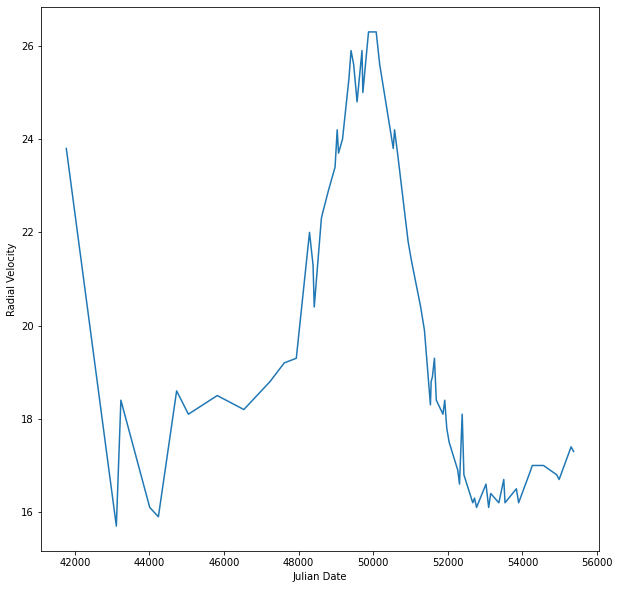

In [3]:
plt.figure(figsize=(10,10))
plt.plot(sbd['Julian Date'],sbd['Radial Velocity (km/s)'])
plt.xlabel('Julian Date')
plt.ylabel('Radial Velocity')
plt.show()

In [4]:
def func(x,a,b,c,d):
    return a*np.sin(b*x+c)+d

In [5]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func,sbd['Julian Date'],sbd['Radial Velocity (km/s)'],p0=[5,0,0,10])
print('a = %f, b = %f, c = %f, d = %f' % (popt[0],popt[1],popt[2],popt[3]))

a = 4.249120, b = -0.000729, c = 37.596738, d = 19.837784


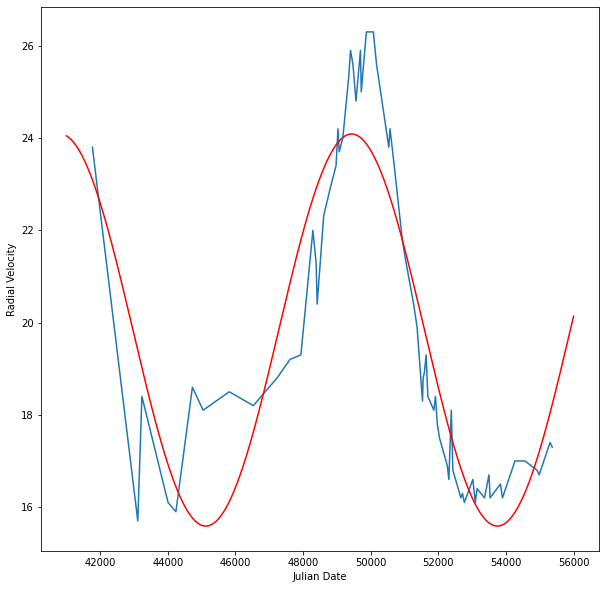

In [6]:
x = np.linspace(41000,56000,10000)
plt.figure(figsize=(10,10))
plt.plot(sbd['Julian Date'],sbd['Radial Velocity (km/s)'])
plt.plot(x,func(x,popt[0],popt[1],popt[2],popt[3]),'-r')
plt.xlabel('Julian Date')
plt.ylabel('Radial Velocity')
plt.show()

In [7]:
perr = np.sqrt(np.diag(pcov))  # Standard deviation errors of parameters a,b,c,d  
print(pcov,perr)

[[ 4.79420823e-02 -3.75603389e-07  2.04301535e-02 -1.16614083e-03]
 [-3.75603389e-07  2.88484204e-10 -1.45547234e-05 -3.18398214e-08]
 [ 2.04301535e-02 -1.45547234e-05  7.37548737e-01 -1.14561735e-03]
 [-1.16614083e-03 -3.18398214e-08 -1.14561735e-03  2.70923985e-02]] [2.18956805e-01 1.69848228e-05 8.58806577e-01 1.64597687e-01]


In [12]:
T = 2*np.pi/popt[1]
print('Periodo en dias Julianos: %f' % np.abs(T))

Periodo en dias Julianos: 8622.077652


In [13]:
print('Periodo en años terrestres: %f' % np.abs(T/365.25))

Periodo en años terrestres: 23.605962
